<a href="https://colab.research.google.com/github/dm54014n/HW7/blob/master/williamcopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load our libraries
%matplotlib notebook
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data2018 = pd.read_csv('/content/bop_data_retrivedbyian.csv')

In [ ]:
original_oyster = data2018['sizeOfLiveOysterMM']

In [ ]:
id_list = [x for x in data2018['_id']]
new_list = []
duplicate = []
print(len(id_list))
for x in id_list:
  if x in new_list:
    duplicate.append(x)
  else:
    new_list.append(x)
print(new_list)
print(duplicate)
print(len(duplicate))

clean_list = []
bad_list = []

for x in range(len(id_list)):
  if id_list[x] in clean_list:
    bad_list.append(x)
  else:
    clean_list.append(id_list[x])

print(clean_list)
print(bad_list)
print(len(bad_list))

1097
['578fc14069723c560e30fca9', '57902d4169723c560e30fe0c', '57902d4169723c560e30fe0b', '578fc14069723c560e30fca7', '57902d4169723c560e30fe0a', '57902d4169723c560e30fe09', '578fc14069723c560e30fca5', '57902d4169723c560e30fe08', '57902d4169723c560e30fe07', '57902d4169723c560e30fe06', '57902d4169723c560e30fe05', '57902d4169723c560e30fe04', '578fc14069723c560e30fca3', '57902d4169723c560e30fe03', '57902d4169723c560e30fe02', '578fc14069723c560e30fca1', '578fc14069723c560e30fc9f', '57902d4169723c560e30fe01', '57902d4169723c560e30fe00', '57902d4169723c560e30fdff', '57902d4169723c560e30fdfe', '578fc14069723c560e30fc9d', '57902d4169723c560e30fdfd', '57902d4169723c560e30fdfc', '57902d4169723c560e30fdfb', '57902d4169723c560e30fdfa', '578fc14069723c560e30fc9b', '57902d4169723c560e30fdf9', '57902d4169723c560e30fdf8', '57902d4169723c560e30fdf7', '57902d4169723c560e30fdf6', '57902d4169723c560e30fdf5', '57902d4169723c560e30fdf4', '578fc14069723c560e30fc99', '57902d4169723c560e30fdf3', '57902d4169723

In [ ]:
rm_indexes = np.array([440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 
                       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 
                       462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 
                       473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 
                       484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 
                       495, 496, 497, 498, 1058, 1059, 1060, 1061, 1062, 1063, 
                       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 
                       1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 
                       1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 
                       1091, 1092, 1093, 1094, 1095, 1096])
data2018 = data2018.drop(data2018.index[rm_indexes])
# last value: row 1059
print(data2018['sizeOfLiveOysterMM'])
print(data2018['sizeOfLiveOysterMM'].head(20))

0       22.0
1       41.0
2       25.0
3       21.0
4       23.0
        ... 
1053    47.0
1054    46.0
1055    46.0
1056    39.0
1057    42.0
Name: sizeOfLiveOysterMM, Length: 999, dtype: float64
0     22.0
1     41.0
2     25.0
3     21.0
4     23.0
5     29.0
6     46.0
7     41.0
8     35.0
9     34.0
10    45.0
11    39.0
12    27.0
13    22.0
14    19.0
15     NaN
16    28.0
17    27.0
18    31.0
19    26.0
Name: sizeOfLiveOysterMM, dtype: float64


In [ ]:
data2018['sizeOfLiveOysterMM'] = data2018['sizeOfLiveOysterMM'].replace(r'^\s*$', np.nan, regex=True)
#data_list = [x for x in data2018['sizeOfLiveOysterMM']]
nums = []
def isNaN(string):
    return string != string

#for x in range(len(data_list)):
  #if isNaN(data2018['sizeOfLiveOysterMM'][x]):
   # nums.append(x)
#print(nums)

oyster_mean = data2018['sizeOfLiveOysterMM'].mean()
oyster_median = data2018['sizeOfLiveOysterMM'].median()

print(oyster_mean)
print(oyster_median)

data2018['sizeOfLiveOysterMM'] = data2018['sizeOfLiveOysterMM'].fillna(oyster_median)
print(data2018['sizeOfLiveOysterMM'][15])

32.49530318602259
32.0
32.0


In [ ]:
# use ph average
data2018['pH_average'] = data2018['pH_average'].replace(r'^\s*$', np.nan, regex=True)

ph_nums = []

all_ph = [x for x in data2018['pH_average']]
          
for x in range(len(all_ph)):
  if all_ph[x] > 14:
    ph_nums.append(x)
print(ph_nums)
#for x in range(len(data2018['pH_average'])):
#  if isNaN(data2018['pH_average'][x]):
#    ph_nums.append(x)
#print(ph_nums)

ph_mean = data2018['pH_average'].mean()
ph_median = data2018['pH_average'].median()

print(ph_mean)
print(ph_median)

data2018['pH_average'] = data2018['pH_average'].fillna(ph_median)
print(data2018['pH_average'].head(20))

[]
6.7806085470082
7.0
0     7.833333
1     7.833333
2     7.833333
3     7.833333
4     7.833333
5     7.833333
6     7.833333
7     7.833333
8     7.833333
9     7.833333
10    7.833333
11    7.833333
12    7.833333
13    7.833333
14    7.833333
15    7.833333
16    7.833333
17    7.833333
18    7.833333
19    7.833333
Name: pH_average, dtype: float64


In [ ]:
df1 = pd.DataFrame(data2018['sizeOfLiveOysterMM'])
df1

,sizeOfLiveOysterMM
0,22.0
1,41.0
2,25.0
3,21.0
4,23.0
...,...
1053,47.0
1054,46.0
1055,46.0
1056,39.0


In [ ]:
df2 = pd.DataFrame(data2018['pH_average'])
df2

,pH_average
0,7.833333
1,7.833333
2,7.833333
3,7.833333
4,7.833333
...,...
1053,6.000000
1054,6.000000
1055,6.000000
1056,6.000000


In [ ]:
df = pd.concat([df1, df2], axis =1)
df

,sizeOfLiveOysterMM,pH_average
0,22.0,7.833333
1,41.0,7.833333
2,25.0,7.833333
3,21.0,7.833333
4,23.0,7.833333
...,...,...
1053,47.0,6.000000
1054,46.0,6.000000
1055,46.0,6.000000
1056,39.0,6.000000


In [ ]:
np.corrcoef(data2018['pH_average'], data2018['sizeOfLiveOysterMM'])

array([[ 1.       , -0.1483949],
       [-0.1483949,  1.       ]])

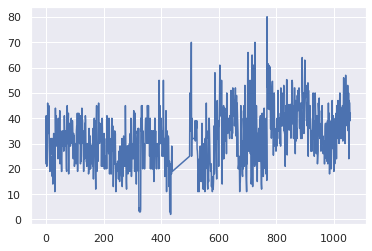

In [ ]:
data2018['sizeOfLiveOysterMM'].plot()

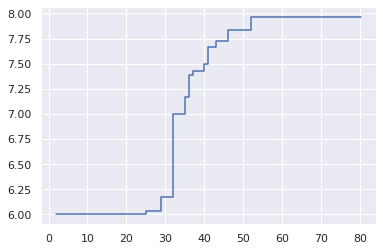

In [ ]:
plt.plot(sorted(data2018['sizeOfLiveOysterMM']), sorted(data2018['pH_average']))

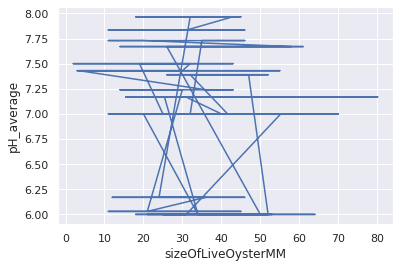

In [ ]:
fig, ax = plt.subplots()
ax.plot(data2018['sizeOfLiveOysterMM'], data2018['pH_average'])
ax.set_xlabel('sizeOfLiveOysterMM')
ax.set_ylabel('pH_average')
plt.show()


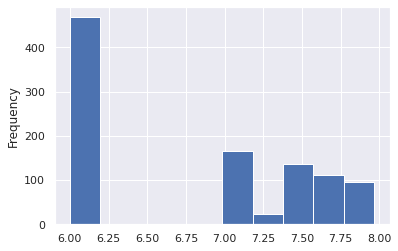

In [ ]:
data2018['pH_average'].plot.hist()

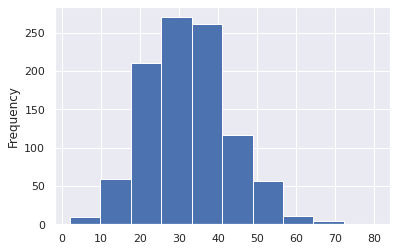

In [ ]:
data2018['sizeOfLiveOysterMM'].plot.hist()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


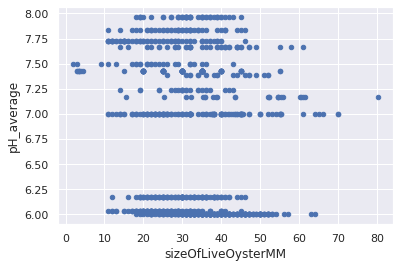

In [ ]:
data2018.plot.scatter(y = 'pH_average', x = 'sizeOfLiveOysterMM')


In [ ]:
rho, pstat = sp.stats.pearsonr(data2018['sizeOfLiveOysterMM'], data2018['pH_average'])
print('rho = %.4f' % rho, 'p-val = %.4f' % pstat)

rho = -0.1484 p-val = 0.0000
